In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[Reference Link](https://www.kaggle.com/datasets/matheusfonsecachaves/popular-video-games)

In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [49]:
dataset = pd.read_csv('backloggd_games.csv')

In [50]:
dataset.replace('?', np.nan, inplace=True)
dataset.dropna(inplace=True)

In [73]:
genres = []
for text in dataset["Genres"]:
    rowGenres = [i.strip("[]' ") for i in text.split(',')]
    for gen in rowGenres:
        if gen not in genres:
            genres.append(gen)
print(genres)

['Adventure', 'RPG', 'Puzzle', 'Brawler', 'Indie', 'Platform', 'Turn Based Strategy', 'Simulator', 'Shooter', 'Strategy', 'Music', 'Arcade', 'Fighting', 'Visual Novel', 'Tactical', 'Card & Board Game', 'Sport', 'Racing', 'MOBA', 'Point-and-Click', 'Real Time Strategy', 'Quiz/Trivia', '', 'Pinball']


In [51]:
def kUnitToNumber(text):
    if type(text) != str:
        return text
    if text[-1].lower() == 'k':
        return int(float(text[:-1]) * 1000)
    else:
        return int(float(text))

In [58]:
dataset["Plays"] = dataset["Plays"].apply(kUnitToNumber)
dataset["Playing"] = dataset["Playing"].apply(kUnitToNumber)
dataset["Backlogs"] = dataset["Backlogs"].apply(kUnitToNumber)
dataset["Wishlist"] = dataset["Wishlist"].apply(kUnitToNumber)
dataset["Lists"] = dataset["Lists"].apply(kUnitToNumber)
dataset["Reviews"] = dataset["Reviews"].apply(kUnitToNumber)

numericalDataset = dataset[["Plays", "Playing", "Backlogs", "Wishlist", "Lists", "Reviews"]]

[[1.         0.64310232]
 [0.64310232 1.        ]]


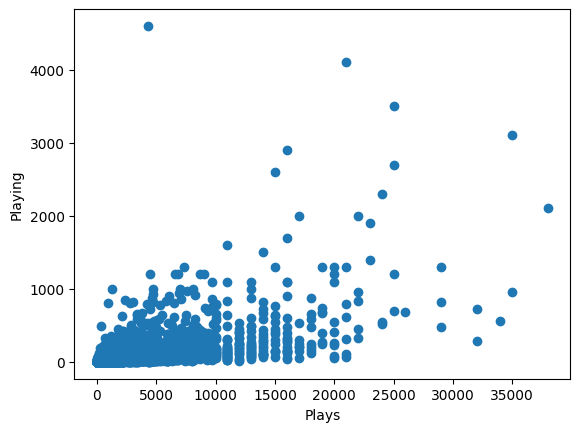

[[1.         0.77433756]
 [0.77433756 1.        ]]


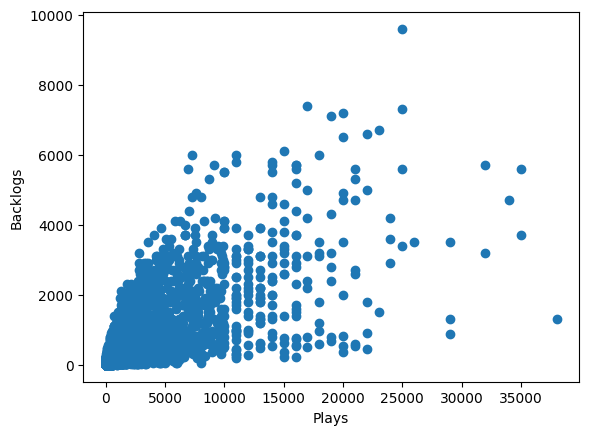

[[1.         0.64624796]
 [0.64624796 1.        ]]


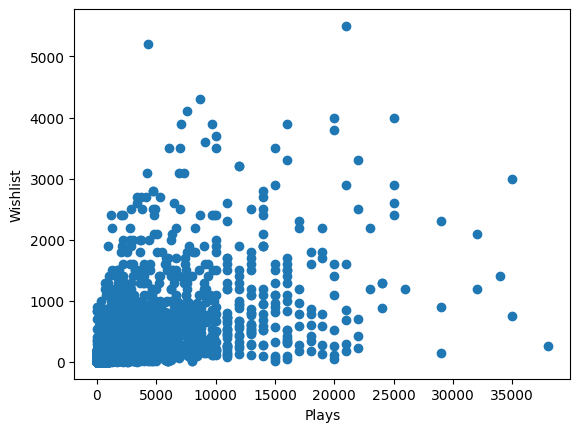

[[1.         0.89977978]
 [0.89977978 1.        ]]


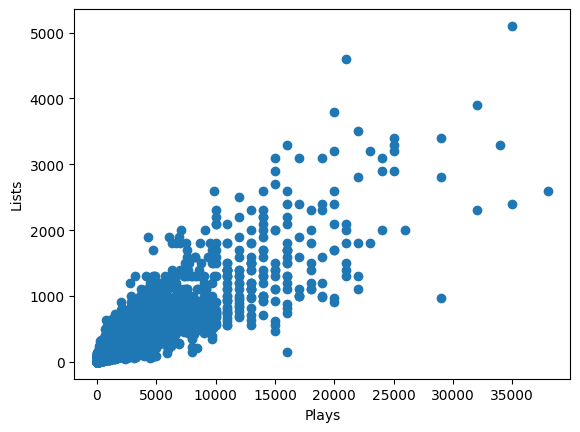

[[1.         0.91529809]
 [0.91529809 1.        ]]


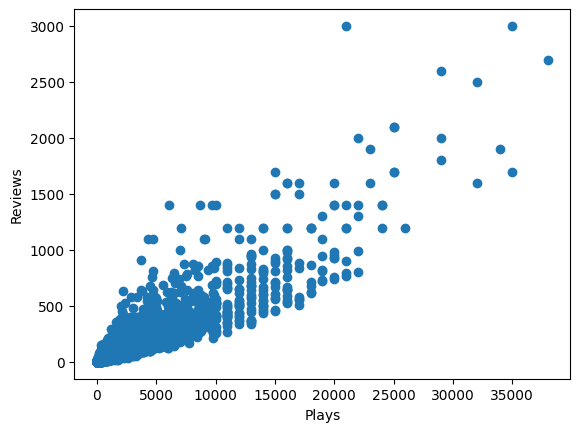

[[1.         0.71162929]
 [0.71162929 1.        ]]


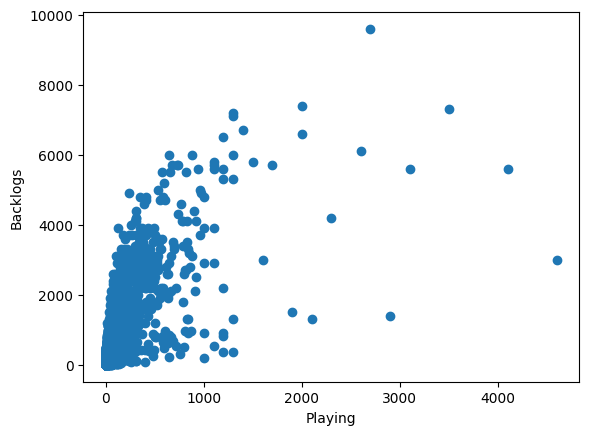

[[1.         0.74162371]
 [0.74162371 1.        ]]


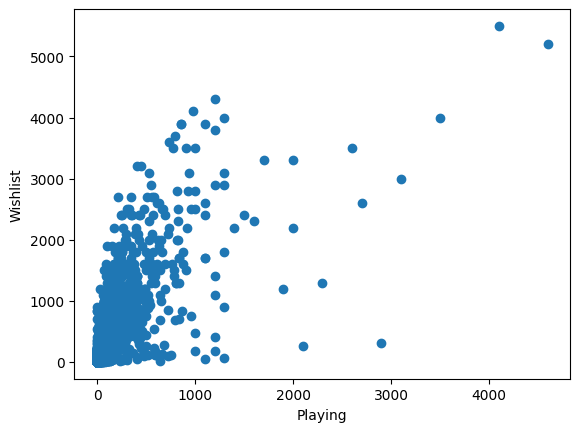

[[1.         0.72393113]
 [0.72393113 1.        ]]


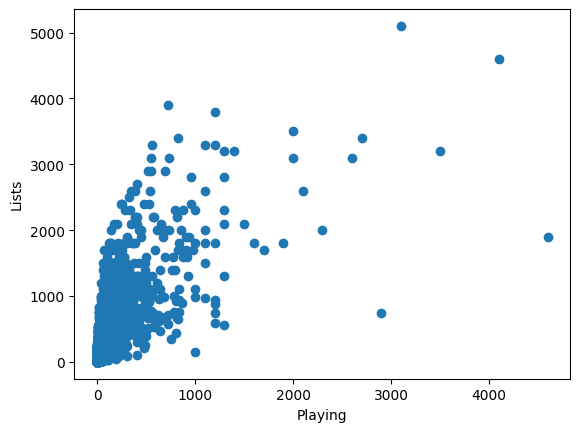

[[1.         0.80716545]
 [0.80716545 1.        ]]


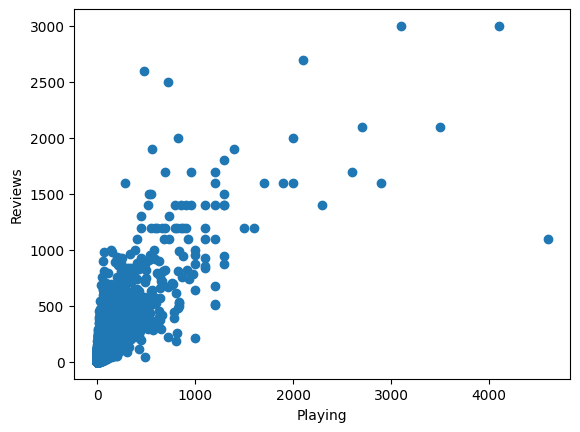

[[1.         0.89077593]
 [0.89077593 1.        ]]


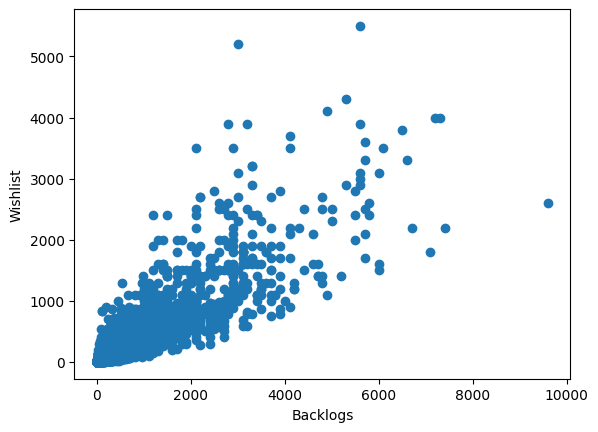

[[1.         0.90481414]
 [0.90481414 1.        ]]


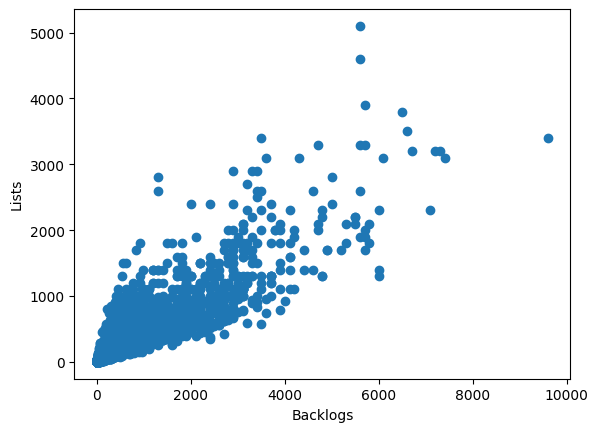

[[1.         0.81254023]
 [0.81254023 1.        ]]


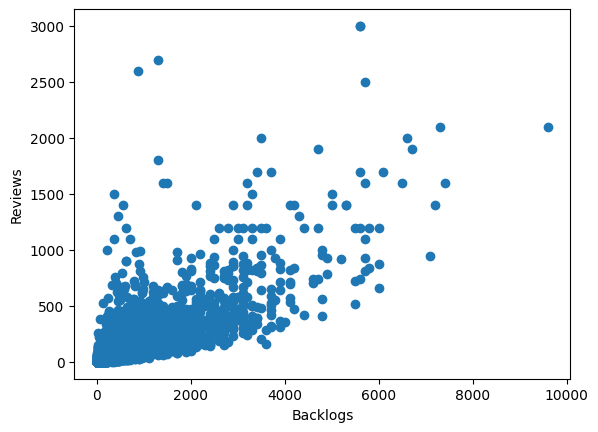

[[1.         0.84499142]
 [0.84499142 1.        ]]


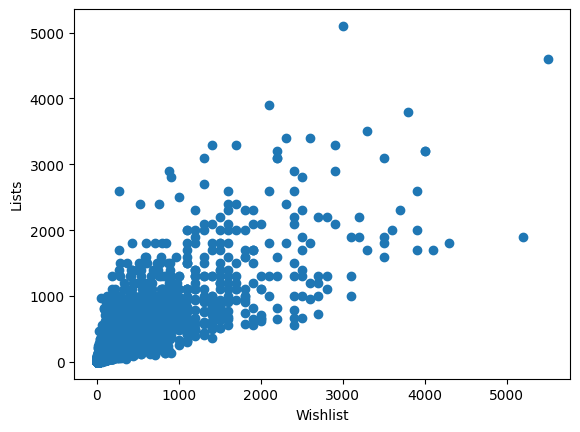

[[1.        0.7761599]
 [0.7761599 1.       ]]


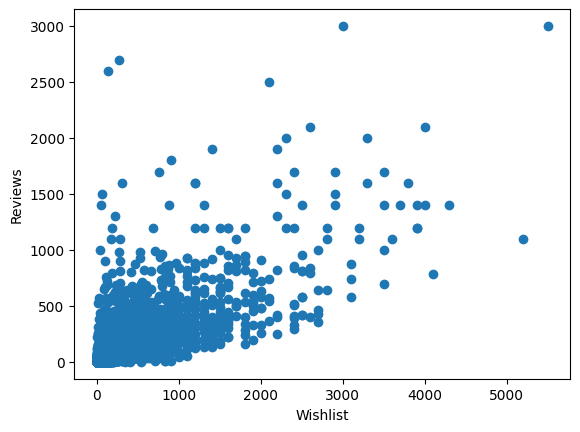

[[1.         0.92119471]
 [0.92119471 1.        ]]


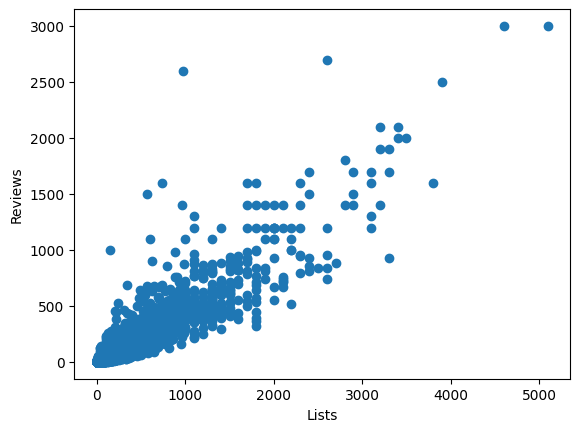

In [63]:
completedColumn = []

for colX in numericalDataset:
    for colY in numericalDataset:
        if colX == colY or colY in completedColumn:
            continue
        correlation = np.corrcoef(numericalDataset[colX], numericalDataset[colY])
        print(correlation)
        plt.scatter(numericalDataset[colX], numericalDataset[colY])
        plt.xlabel(colX)
        plt.ylabel(colY)
        plt.show()
    completedColumn.append(colX)